In [1]:
# import packages and data set that will be used for the logistics regression analysis
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')

In [2]:
# check if there is any missing data entries. Output should be false.
df.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [3]:
# check if there are any duplicate data in columns
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [4]:
# check if any of the columns are duplicated. Output should be False.
df.columns.duplicated().any()

False

In [5]:
# check if any of the rows are duplicated. Output should be False.
df.duplicated().any()

False

In [6]:
# to begin cleaning the data, first drop the columns for survey questions.
df.drop(['Item8','Item7','Item6','Item5','Item4','Item3','Item2','Item1'],axis = 1,inplace=True)

In [7]:
# drop the columns for demographic data
df.drop(['City','State','County','Area','Zip','Lat','Lng','Population','TimeZone'],axis = 1,inplace=True)

In [8]:
# drop all of the columns for interaction data deemed as not needed
df.drop(['Additional_charges','TotalCharge','Services','Interaction','UID'],axis = 1,inplace=True)

In [9]:
# drop the remaining columns for other data not needed in this analysis
df.drop(['Customer_id','Job','CaseOrder'],axis = 1, inplace=True)

In [10]:
# verify that all the columns were dropped before proceeding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  object 
 11  Initial_admin       10000 non-null  object 
 12  HighBlood           10000 non-null  object 
 13  Stroke              10000 non-null  object 
 14  Complication_risk   10000 non-null  object 
 15  Overweight          10000 non-null  object 
 16  Arthr

In [11]:
# Callout the target variable "ReAdmis" and describe it's characteristics
target = 'ReAdmis'
for idx, c in enumerate(df.loc[:, df.columns == target]):
     if df.dtypes[c] == "object":
             print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
for idx,name in enumerate(df[c].value_counts().index.tolist()):
    print('\t{:<8}:{:>6}'.format(name,df[c].value_counts()[idx]))
    print('\n{}. {} is numerical.'.format(idx+1, c))


1. ReAdmis is categorical: ['No' 'Yes'].
	No      :  6331

1. ReAdmis is numerical.
	Yes     :  3669

2. ReAdmis is numerical.


In [12]:
# consolidate the data for the marital variable
df['Marital']=np.where(df['Marital'] =='Widowed', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Separated', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Never Married', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Divorced', 'Not_Married',df['Marital'])

In [13]:
# show the new values for the marital variable to make sure the consolidation worked
df['Marital'].unique()

array(['Not_Married', 'Married'], dtype=object)

In [14]:
# Output and describe the input variables of the data set
for idx, c in enumerate(df.loc[:, df.columns != target]):
    if df.dtypes[c] == "object":
        print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
for idx,name in enumerate(df[c].value_counts().index.tolist()):
    print('\t{:<20}:{:>6}'.format(name,df[c].value_counts()[idx]))
    print('{}'.format(df[c].describe()))
    print('\n{}. {} is numerical.'.format(idx+1, c))


4. Marital is categorical: ['Not_Married' 'Married'].

5. Gender is categorical: ['Male' 'Female' 'Nonbinary'].

10. Soft_drink is categorical: ['No' 'Yes'].

11. Initial_admin is categorical: ['Emergency Admission' 'Elective Admission' 'Observation Admission'].

12. HighBlood is categorical: ['Yes' 'No'].

13. Stroke is categorical: ['No' 'Yes'].

14. Complication_risk is categorical: ['Medium' 'High' 'Low'].

15. Overweight is categorical: ['No' 'Yes'].

16. Arthritis is categorical: ['Yes' 'No'].

17. Diabetes is categorical: ['Yes' 'No'].

18. Hyperlipidemia is categorical: ['No' 'Yes'].

19. BackPain is categorical: ['Yes' 'No'].

20. Anxiety is categorical: ['Yes' 'No'].

21. Allergic_rhinitis is categorical: ['Yes' 'No'].

22. Reflux_esophagitis is categorical: ['No' 'Yes'].

23. Asthma is categorical: ['Yes' 'No'].


KeyError: 0

In [15]:
# print the columns for categorical data
CategoricalData = df.select_dtypes(include = "object").columns
print(CategoricalData)

Index(['Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'],
      dtype='object')


In [16]:
# print the columns for numerical data
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days'],
      dtype='object')


In [17]:
# set up the "get redundant pairs" parameter for this analysis
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [18]:
# set up the "custom correlation matrix" parameters for this analysis 
def custom_corr_matrix(df, title):
    fig = plt.figure(figsize=(30, 30))
    sns.set(font_scale=1.0)
    sns.heatmap(data=df.corr().round(1), annot=True,annot_kws={'size':30})
    print(get_top_abs_correlations(df))
    #plt.savefig('output/' + COURSE + '/fig_corr_matrix_' + title + '.png', facecolor='w')
    plt.show()
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [19]:
# establish the parameters for plotting histograms
def plot_histogram(c):
    df_yes = df[df.ReAdmis_Yes==1][c]
    df_no = df[df.ReAdmis_Yes==0][c]
    yes_mean = df_yes.mean();
    no_mean = df_no.mean();
    fig,ax = plt.subplots(figsize=(6,6))
    ax.hist([df_yes,df_no], bins=5, stacked=True)
    ax.legend(['ReAdmis - Yes','ReAdmis - No'])
    ymin, ymax = ax.get_ylim();
    xmin, xmax = ax.get_xlim()
    ax.axvline(yes_mean, color='green', lw=2) # yes mean
    ax.axvline(no_mean, color='red', lw=2) # no mean
    ax.text((xmax-xmin)/2, (ymax-ymin)/2, 'Delta:\n' + str(round(abs(yes_mean - no_mean),2)),
           bbox={'facecolor':'white'})
    plt.title('Histogram with target overlay by ' + str(c))
    plt.xlabel(c);
    plt.ylabel('# ReAdmis');
    plt.show();

In [20]:
# set up a helper function to plot grouped bar plot
def plot_stacked(c):
    df.groupby([c,target]).size().unstack().plot(kind='bar', stacked=True)

No     6331
Yes    3669
Name: ReAdmis, dtype: int64


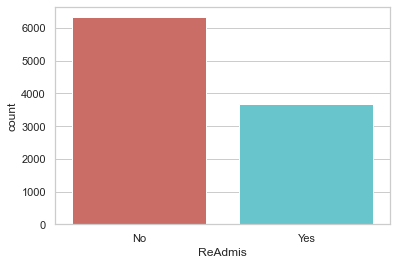

In [21]:
# data cleaning is complete and parameters have been set, and we can now proceed to the analysis
# begin visuallizing the data and include the univariate and bivariate analyses
print(df[target].value_counts())
sb.countplot(x=target, data=df, palette='hls')
plt.show()

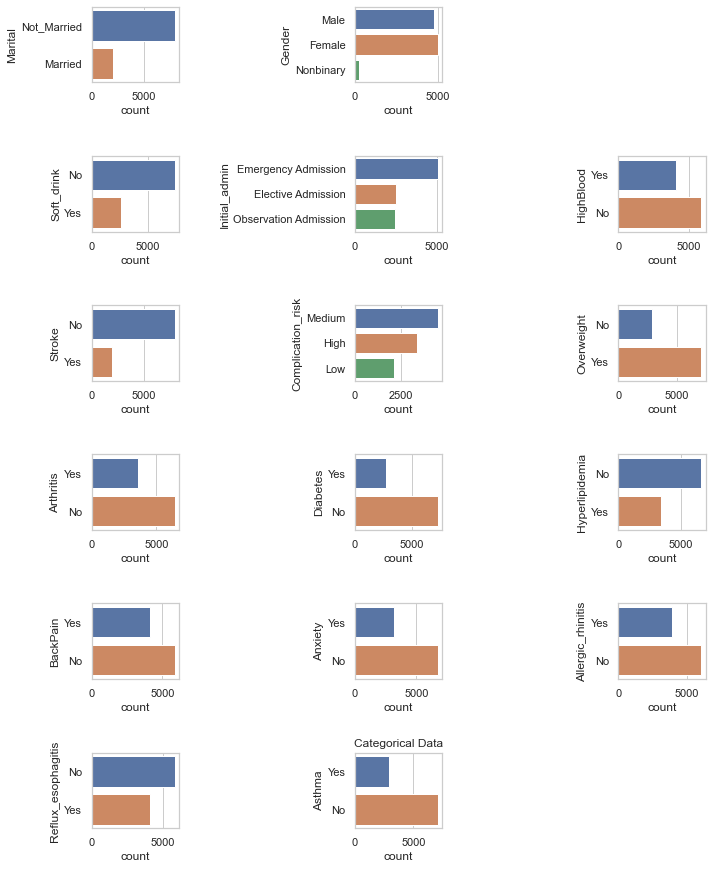

In [22]:
# visualize the categorical data and include the univariate and bivariate analyses
fig = plt.figure(figsize=(10, 20))
for i, col in enumerate(CategoricalData):
    if col != target:
        plt.subplot(10, 3, i+1)
        ax = sb.countplot(y=col, data=df)
        fig.tight_layout(h_pad=4, w_pad=4)
plt.title('Categorical Data')
plt.show()

<AxesSubplot:xlabel='Asthma'>

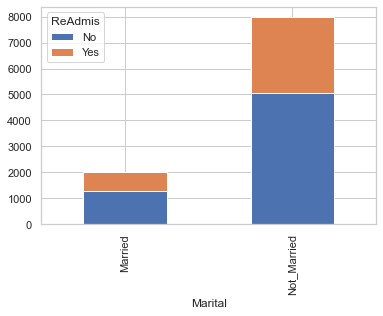

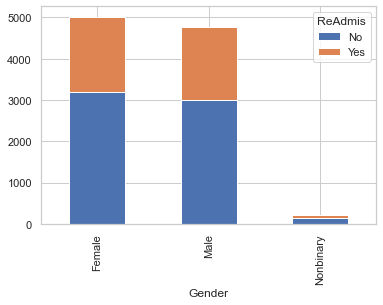

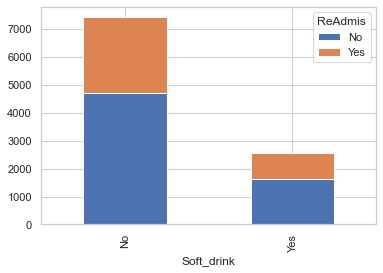

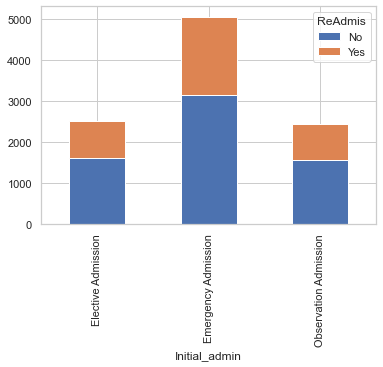

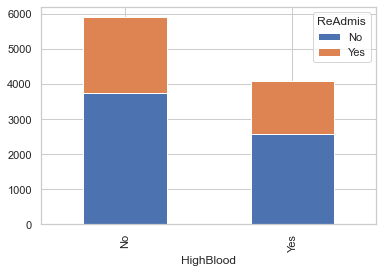

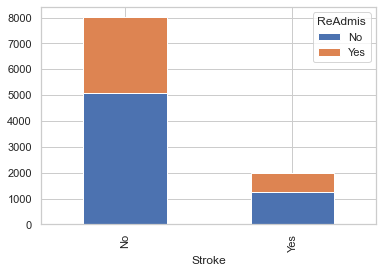

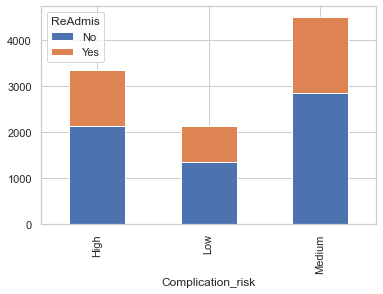

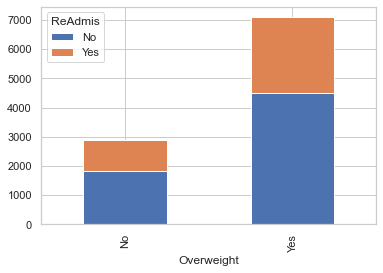

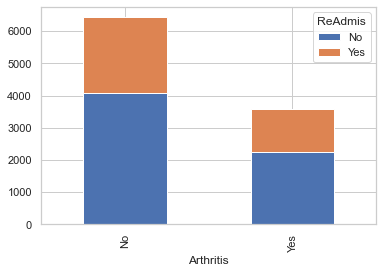

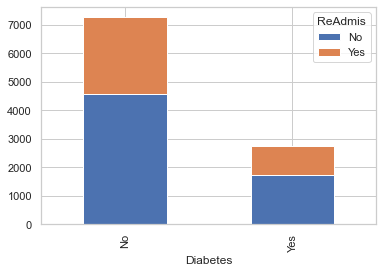

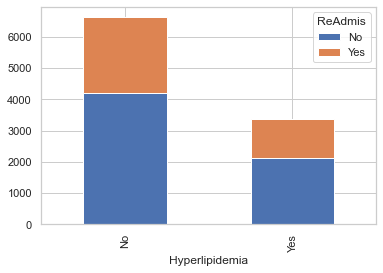

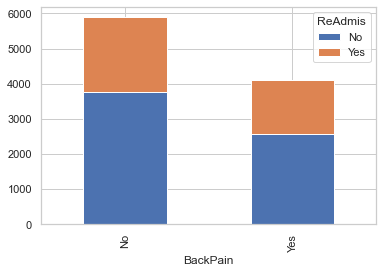

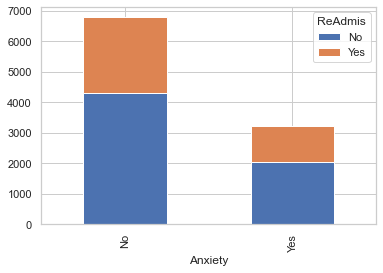

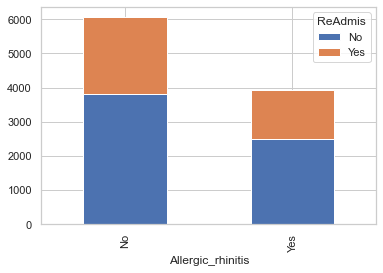

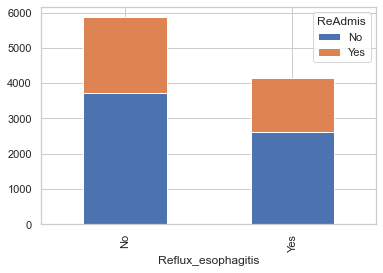

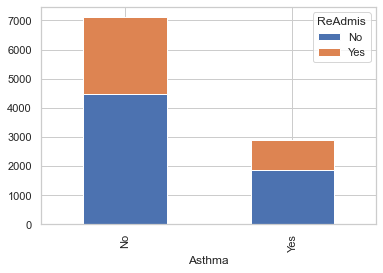

In [23]:
# Compare the target variable "ReAdmis" to ALL of the categorical variables
tbl = pd.pivot_table(df.groupby(['Marital','ReAdmis']).size().reset_index(),
values=0,
index='Marital',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Gender','ReAdmis']).size().reset_index(),
values=0,
index='Gender',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Soft_drink','ReAdmis']).size().reset_index(),
values=0,
index='Soft_drink',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Initial_admin','ReAdmis']).size().reset_index(),
values=0,
index='Initial_admin',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['HighBlood','ReAdmis']).size().reset_index(),
values=0,
index='HighBlood',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Stroke','ReAdmis']).size().reset_index(),
values=0,
index='Stroke',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Complication_risk','ReAdmis']).size().reset_index(),
values=0,
index='Complication_risk',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Overweight','ReAdmis']).size().reset_index(),
values=0,
index='Overweight',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Arthritis','ReAdmis']).size().reset_index(),
values=0,
index='Arthritis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Diabetes','ReAdmis']).size().reset_index(),
values=0,
index='Diabetes',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Hyperlipidemia','ReAdmis']).size().reset_index(),
values=0,
index='Hyperlipidemia',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['BackPain','ReAdmis']).size().reset_index(),
values=0,
index='BackPain',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Anxiety','ReAdmis']).size().reset_index(),
values=0,
index='Anxiety',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Allergic_rhinitis','ReAdmis']).size().reset_index(),
values=0,
index='Allergic_rhinitis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Reflux_esophagitis','ReAdmis']).size().reset_index(),
values=0,
index='Reflux_esophagitis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Asthma','ReAdmis']).size().reset_index(),
values=0,
index='Asthma',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)

In [24]:
# review numerical mean data compared to target variable
df.groupby(target).mean().round(2).T

ReAdmis,No,Yes
Children,2.06,2.16
Age,53.26,53.94
Income,40740.26,40059.52
VitD_levels,17.96,17.98
Doc_visits,5.01,5.01
Full_meals_eaten,1.01,0.99
vitD_supp,0.39,0.41
Initial_days,17.41,63.86


In [25]:
# retrieve statistics for numerical data
df[NumericalData].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Children,10000.0,2.097,2.164,0.000,0.000,1.000,3.000,10.000
Age,10000.0,53.512,20.639,18.000,36.000,53.000,71.000,89.000
Income,10000.0,40490.495,28521.153,154.080,19598.775,33768.420,54296.402,207249.100
VitD_levels,10000.0,17.964,2.017,9.806,16.626,17.951,19.348,26.394
Doc_visits,10000.0,5.012,1.046,1.000,4.000,5.000,6.000,9.000
Full_meals_eaten,10000.0,1.001,1.008,0.000,0.000,1.000,2.000,7.000
vitD_supp,10000.0,0.399,0.629,0.000,0.000,0.000,1.000,5.000
Initial_days,10000.0,34.455,26.309,1.002,7.896,35.836,61.161,71.981


<Figure size 720x1440 with 0 Axes>

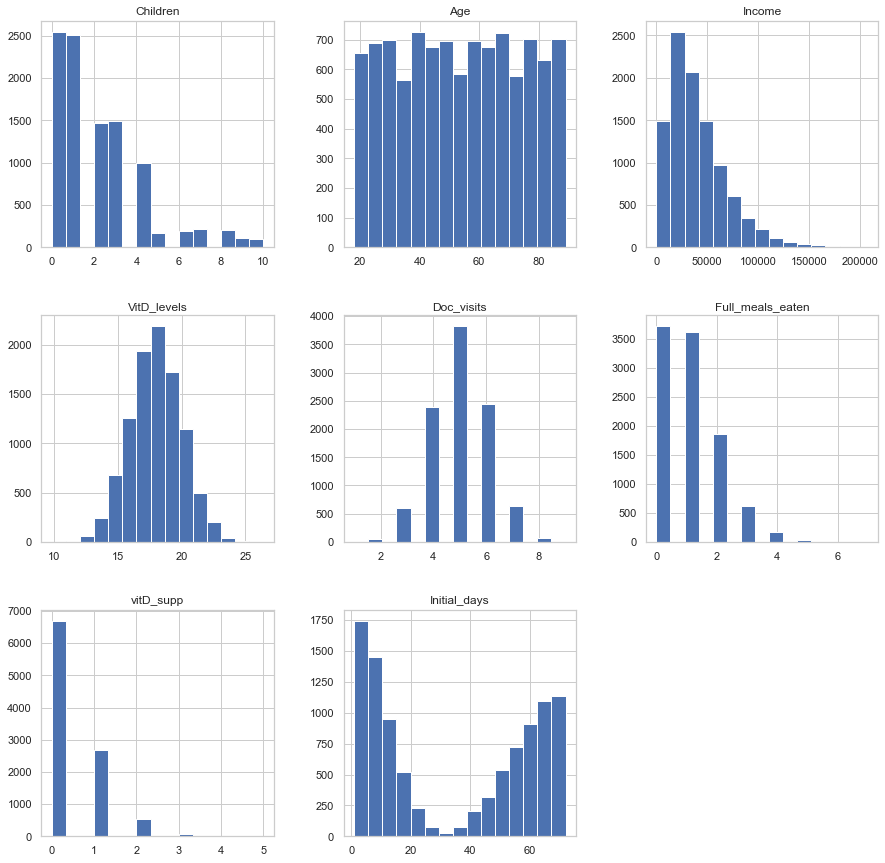

In [26]:
# create histogram plots for the numeric data
fig = plt.figure(figsize=(10, 20))
ax = df[NumericalData].hist(bins = 15, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

In [27]:
# update the target variable to "Yes" for readmissions
target = 'ReAdmis_Yes'

In [28]:
# convert the categorical data into binary data for the analysis
for c in CategoricalData:
    if c in df.columns:
        df = pd.get_dummies(df, columns=[c], drop_first=True)
pred_vars = df.select_dtypes(include="uint8").columns.tolist()
print(pred_vars)

['Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'ReAdmis_Yes', 'Soft_drink_Yes', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes']


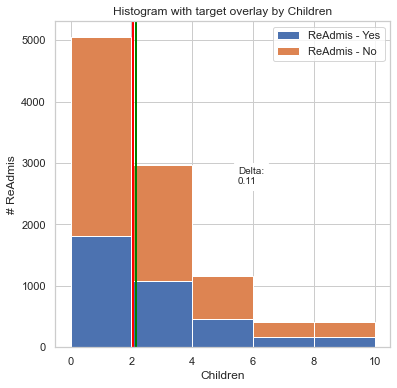

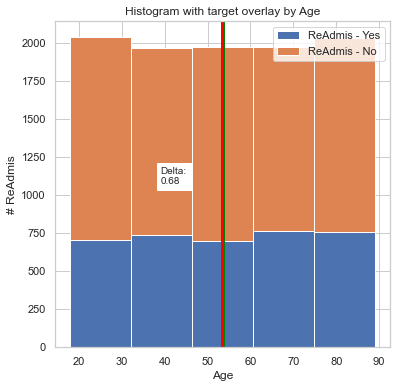

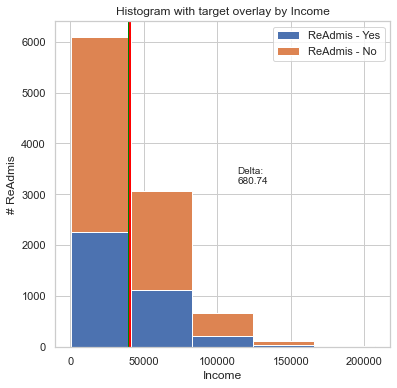

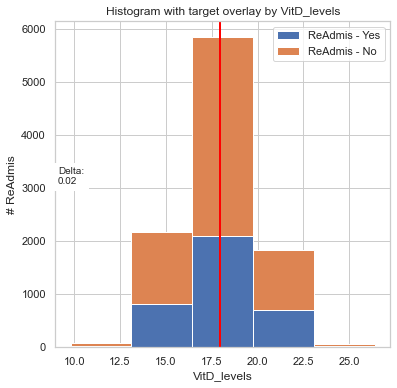

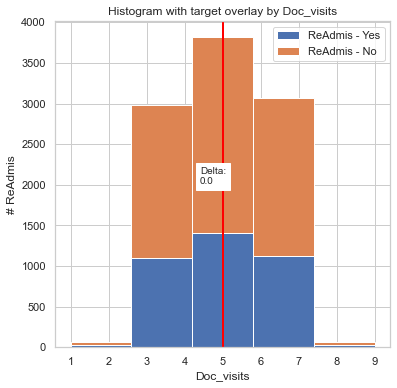

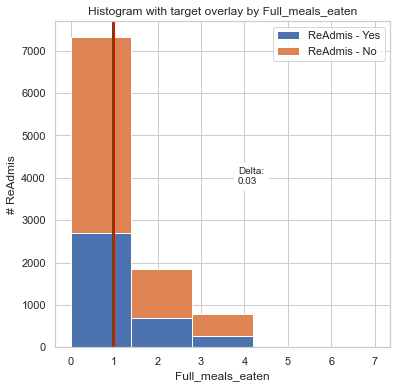

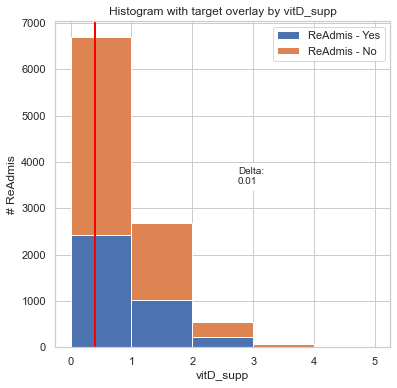

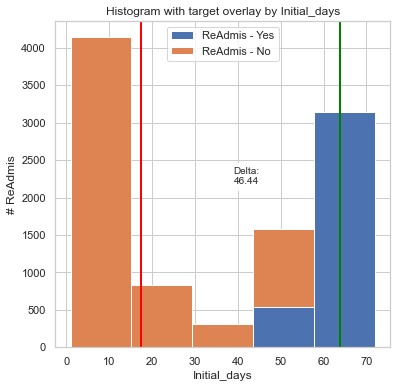

In [29]:
# create histograms with overlay of the target variable
plot_histogram('Children')
plot_histogram('Age')
plot_histogram('Income')
plot_histogram('VitD_levels')
plot_histogram('Doc_visits')
plot_histogram('Full_meals_eaten')
plot_histogram('vitD_supp')
plot_histogram('Initial_days')

In [30]:
# since our target variable is the "yes" responses, drop unwanted "no" data
cols_to_be_removed = ['ReAdmis_No']

In [31]:
# print a list of dropped "no" data
print('data to be removed: {}'.format(cols_to_be_removed))

data to be removed: ['ReAdmis_No']


In [32]:
# loop through list to see if it is in current dataframe and if the column needs to be dropped
for c in cols_to_be_removed:
    if c in df.columns:
        df.drop(columns = c, inplace=True)
print('Data named [{}] has been removed.'.format(c))

Data named [ReAdmis_No] has been removed.


In [33]:
# rebalance the prepared data using the SMOTE oversample function
os = SMOTE(random_state=0)
X = df.loc[:, df.columns != 'ReAdmis_Yes']
y = df.loc[:, df.columns == 'ReAdmis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['ReAdmis_Yes'])

In [34]:
# Check the numbers of our data to see if new dataset is now balanced after traning and sampling
print("length of oversampled data is ",len(os_data_X))
print("Number of no ReAdmis in oversampled data",len(os_data_y[os_data_y['ReAdmis_Yes']==0]))
print("Number of ReAdmis",len(os_data_y[os_data_y['ReAdmis_Yes']==1]))
print("Proportion of no ReAdmis data in oversampled data is",len(os_data_y[os_data_y['ReAdmis_Yes']==0])/len(os_data_X))
print("Proportion of ReAdmis data in oversampled data is",len(os_data_y[os_data_y['ReAdmis_Yes']==1])/len(os_data_X))

length of oversampled data is  8840
Number of no ReAdmis in oversampled data 4420
Number of ReAdmis 4420
Proportion of no ReAdmis data in oversampled data is 0.5
Proportion of ReAdmis data in oversampled data is 0.5


In [69]:
# implement the RFE feature reduction
data_final_vars=df.columns.values.tolist()
y=[target]
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True False False  True False False False  True]
[1 1 5 2 1 3 6 4 1]


Index(['Initial_days', 'Initial_admin_Emergency Admission',
       'Complication_risk_Low', 'Asthma_Yes'],
      dtype='object')

In [38]:
# create the initial model for the logisitics regression
X=os_data_X[features] # from RFE above
Xc = sm.add_constant(X) # reset
y=os_data_y[target]
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 14
                                   Results: Logit
Model:                      Logit                    Pseudo R-squared:         inf   
Dependent Variable:         ReAdmis_Yes              AIC:                      inf   
Date:                       2022-10-11 22:17         BIC:                      inf   
No. Observations:           8840                     Log-Likelihood:           -inf  
Df Model:                   13                       LL-Null:                  0.0000
Df Residuals:               8826                     LLR p-value:              1.0000
Converged:                  1.0000                   Scale:                    1.0000
No. Iterations:             14.0000                                                  
-------------------------------------------------------------------------------------
                                   Coef.   Std.Err.    z     P>|z|   [0.025   

C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params avai

C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


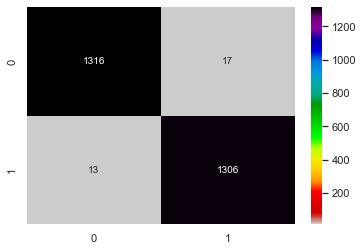

In [39]:
# create a confusion matrix for the initial model
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predicted = lgr.predict(X_test)
expected = y_test
confusion = pd.DataFrame(confusion_matrix(y_true=expected, y_pred=predicted),index=range(2),columns=range(2))
axes = sb.heatmap(confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

In [40]:
# calculate number and percent of predictions
correct = sum(np.diagonal(confusion)) # on diag
total = confusion.values.sum()
incorrect = total - correct # off diag
print('Correct predictions on diagonal: {} ({:.0%})'.format( correct, correct / total ))
print('Incorrect predictions off diagonal: {} ({:.0%})'.format( incorrect, incorrect / total ))

Correct predictions on diagonal: 2622 (99%)
Incorrect predictions off diagonal: 30 (1%)


In [41]:
# find predictor pairs with high coorelation
get_top_abs_correlations(X, 20)

Initial_days           HighBlood_Yes                        0.103712
                       Diabetes_Yes                         0.092126
                       Asthma_Yes                           0.091103
                       Allergic_rhinitis_Yes                0.089457
                       Initial_admin_Emergency Admission    0.088982
                       Soft_drink_Yes                       0.088652
                       Anxiety_Yes                          0.084048
                       Arthritis_Yes                        0.078638
                       Stroke_Yes                           0.075024
                       Reflux_esophagitis_Yes               0.073954
                       Complication_risk_Low                0.066906
HighBlood_Yes          Asthma_Yes                           0.057865
Complication_risk_Low  Allergic_rhinitis_Yes                0.056692
HighBlood_Yes          Allergic_rhinitis_Yes                0.054012
Arthritis_Yes          Anxiety_Yes

In [51]:
# reduce the model before running the logistic regression
features.remove('Soft_drink_Yes') # high p-value

ValueError: list.remove(x): x not in list

In [53]:
# reduce the model before running the logistic regression
features.remove('Reflux_esophagitis_Yes') # high p-value

In [55]:
# create the reduced logit model
X=os_data_X[features]
y=os_data_y[target]
Xc = sm.add_constant(X) # reset
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 14
                                   Results: Logit
Model:                      Logit                    Pseudo R-squared:         inf   
Dependent Variable:         ReAdmis_Yes              AIC:                      inf   
Date:                       2022-10-11 22:55         BIC:                      inf   
No. Observations:           8840                     Log-Likelihood:           -inf  
Df Model:                   9                        LL-Null:                  0.0000
Df Residuals:               8830                     LLR p-value:              1.0000
Converged:                  1.0000                   Scale:                    1.0000
No. Iterations:             14.0000                                                  
-------------------------------------------------------------------------------------
                                   Coef.   Std.Err.    z     P>|z|   [0.025   

C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params avai

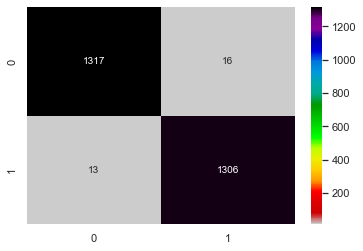

In [56]:
# confustion matrix for final model
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predicted = lgr.predict(X_test)
expected = y_test
confusion = pd.DataFrame(confusion_matrix(y_true=expected, y_pred=predicted),index=range(2),columns=range(2))
axes = sb.heatmap(confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

In [57]:
# calculate the number and percent of correct and incorrect predictions for the reduced model
correct = sum(np.diagonal(confusion)) # on diag
total = confusion.values.sum()
incorrect = total - correct # off diag
print('Correct predictions on diagonal: {} ({:.0%})'.format( correct, correct / total ))
print('Incorrect predictions off diagonal: {} ({:.0%})'.format( incorrect, incorrect / total ))

Correct predictions on diagonal: 2623 (99%)
Incorrect predictions off diagonal: 29 (1%)


In [58]:
# print the classification report for the reduced model
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1333
           1       0.99      0.99      0.99      1319

    accuracy                           0.99      2652
   macro avg       0.99      0.99      0.99      2652
weighted avg       0.99      0.99      0.99      2652



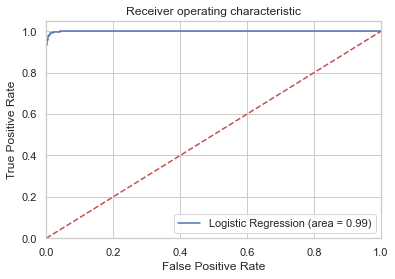

In [59]:
# plot the ROC Curve to help visualize the results
logit_roc_auc = roc_auc_score(y_test, lgr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgr.predict_proba(X_test)
[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [60]:
# Discuss Results of the reduced logistic regression model
# create an equation of the logistic regression
print('Logit: {:.2f}'.format(logit_roc_auc))
equation = result.summary2().tables[1]
print('Estimate [{}] as L = '.format(result.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print(' {:+.3f} x ( {} ) '.format(i[1],i[0]))

Logit: 0.99
Estimate [ReAdmis_Yes] as L = 
 -70.520 x ( const ) 
 +1.306 x ( Initial_days ) 
 +1.515 x ( Initial_admin_Emergency Admission ) 
 +0.521 x ( HighBlood_Yes ) 
 +1.190 x ( Stroke_Yes ) 
 -1.620 x ( Complication_risk_Low ) 
 -1.408 x ( Arthritis_Yes ) 
 +0.317 x ( Diabetes_Yes ) 
 -0.465 x ( Allergic_rhinitis_Yes ) 
 -1.582 x ( Asthma_Yes ) 


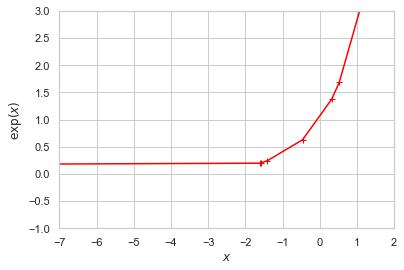

In [63]:
# create a visualization of the logistic coefficient
import matplotlib.pyplot as plt
X_coeff = []
for i in equation.itertuples():
    X_coeff.append(i[1])
X_coeff.sort()
x = X_coeff
y = np.exp(x)
plt.figure()
plt.plot(X_coeff, y, color="red", marker="+")
plt.xlim([-7.0, 2.0])
plt.ylim([-1.0, 3.0])
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.show()

In [65]:
# export the prepared dataset used
df.to_csv(r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean-PREPAREDTASK2.csv')